# Breast Cancer Prediction

## 1. Data processing

In [1]:
# load data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools
import timeit

plt.style.use('fivethirtyeight')
%matplotlib inline

cancer=pd.read_csv('data/breast-cancer-w-diag.csv', header=0)
cancer.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

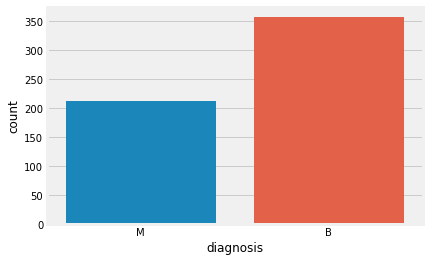

In [2]:
sns.countplot(x='diagnosis',data=cancer)
plt.show()

In [3]:
cancer.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [4]:
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
cancer.drop('id',axis=1,inplace=True)
cancer.drop('Unnamed: 32',axis=1,inplace=True)
# size of the dataframe
len(cancer)

569

In [6]:
cancer.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [7]:
cancer['diagnosis'] = cancer['diagnosis'].map({'M':1,'B':0})
cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
cancer.head(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


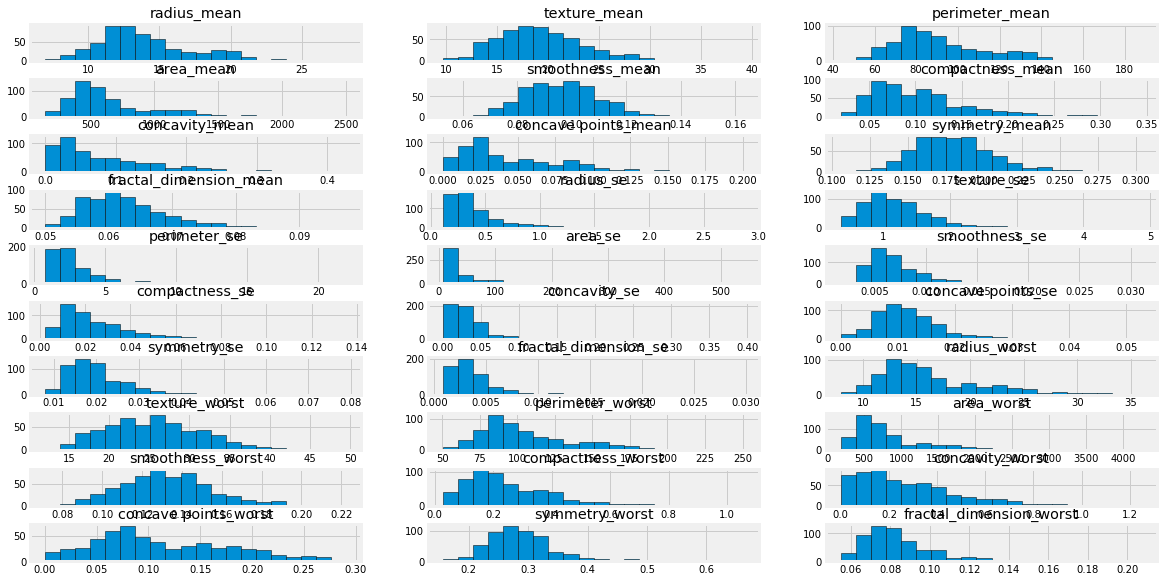

In [9]:
columns=cancer.columns[1:31]
plt.subplots(figsize=(18,15))
length=len(columns)
for i,j in itertools.izip_longest(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    cancer[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

### nucleus features vs diagnosis

In [10]:
features_mean=list(cancer.columns[1:11])
# split dataframe into two based on diagnosis
dfM=cancer[cancer['diagnosis'] ==1]
dfB=cancer[cancer['diagnosis'] ==0]

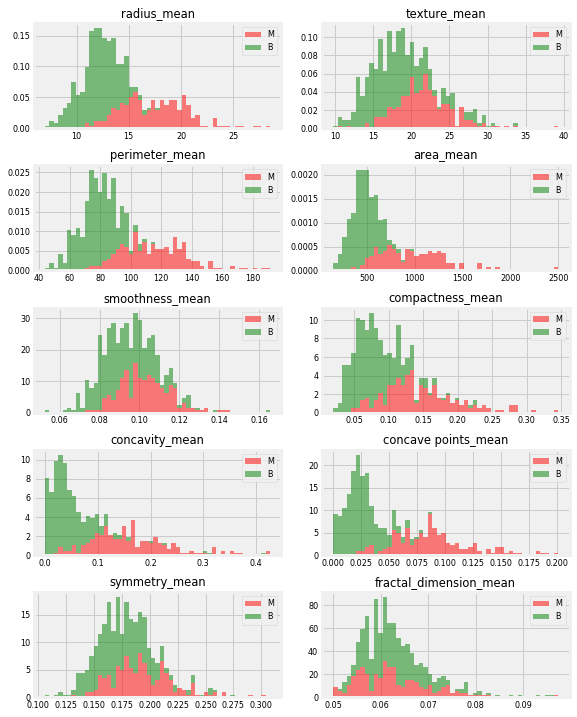

In [11]:
#Stack the data
plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(8,10))
axes = axes.ravel()
for idx,ax in enumerate(axes):
    ax.figure
    binwidth= (max(cancer[features_mean[idx]]) - min(cancer[features_mean[idx]]))/50
    ax.hist([dfM[features_mean[idx]],dfB[features_mean[idx]]], bins=np.arange(min(cancer[features_mean[idx]]), max(cancer[features_mean[idx]]) + binwidth, binwidth) , alpha=0.5,stacked=True, normed = True, label=['M','B'],color=['r','g'])
    ax.legend(loc='upper right')
    ax.set_title(features_mean[idx])
plt.tight_layout()
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.learning_curve import validation_curve
from sklearn.learning_curve import learning_curve
from time import time
import warnings
warnings.filterwarnings('ignore')

# set the following figure sizes
plt.rcParams.update({'font.size': 10})
plt.rcParams.update({'figure.figsize': (4,3)})

/Users/xiaolu/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/xiaolu/anaconda/lib/python2.7/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


### Stratification
When we split the dataset into train and test datasets, the split is completely random. Thus the instances of each class label or outcome in the train or test datasets is random. Thus we may have many instances of class 1 in training data and less instances of class 2 in the training data. So during classification, we may have accurate predictions for class1 but not for class2. Thus we stratify the data, so that we have proportionate data for all the classes in both the training and testing data.

In [14]:
cancer.shape

(569, 31)

In [15]:
#outcome=cancer['LeagueIndex']
#data=cancer[cancer.columns[:18]]
train,test=train_test_split(cancer,test_size=0.2,random_state=0,stratify=cancer['diagnosis'])# stratify the outcome
train_X=train[train.columns[1:31]]
test_X=test[test.columns[1:31]]
train_Y=train['diagnosis']
test_Y=test['diagnosis']

In [16]:
train_X.head(5)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
381,11.04,14.93,70.67,372.7,0.07987,0.07079,0.03546,0.020740,0.2003,0.06246,...,12.090,20.83,79.73,447.1,0.1095,0.1982,0.15530,0.06754,0.3202,0.07287
144,10.75,14.97,68.26,355.3,0.07793,0.05139,0.02251,0.007875,0.1399,0.05688,...,11.950,20.72,77.79,441.2,0.1076,0.1223,0.09755,0.03413,0.2300,0.06769
136,11.71,16.67,74.72,423.6,0.10510,0.06095,0.03592,0.026000,0.1339,0.05945,...,13.330,25.48,86.16,546.7,0.1271,0.1028,0.10460,0.06968,0.1712,0.07343
116,8.95,15.76,58.74,245.2,0.09462,0.12430,0.09263,0.023080,0.1305,0.07163,...,9.414,17.07,63.34,270.0,0.1179,0.1879,0.15440,0.03846,0.1652,0.07722
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.152000,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.1650,0.8681,0.93870,0.26500,0.4087,0.12400


In [17]:
train_Y.head(2)

381    0
144    0
Name: diagnosis, dtype: int64

In [18]:
train_X.shape

(455, 30)

In [19]:
test_X.shape

(114, 30)

In [20]:
train_X.columns

Index([u'radius_mean', u'texture_mean', u'perimeter_mean', u'area_mean',
       u'smoothness_mean', u'compactness_mean', u'concavity_mean',
       u'concave points_mean', u'symmetry_mean', u'fractal_dimension_mean',
       u'radius_se', u'texture_se', u'perimeter_se', u'area_se',
       u'smoothness_se', u'compactness_se', u'concavity_se',
       u'concave points_se', u'symmetry_se', u'fractal_dimension_se',
       u'radius_worst', u'texture_worst', u'perimeter_worst', u'area_worst',
       u'smoothness_worst', u'compactness_worst', u'concavity_worst',
       u'concave points_worst', u'symmetry_worst', u'fractal_dimension_worst'],
      dtype='object')

### Scaling

In [21]:
from sklearn.preprocessing import StandardScaler

# fit a standardScaler to normalize all input to zero mean and unit variance
scaler = StandardScaler().fit(train_X)
train_X = pd.DataFrame(scaler.transform(train_X), columns = train_X.columns)
test_X = pd.DataFrame(scaler.transform(test_X), columns = test_X.columns)

In [22]:
type(train_X)

pandas.core.frame.DataFrame

In [23]:
train_X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,-0.862083,-1.009094,-0.861347,-0.786765,-1.158494,-0.615198,-0.654171,-0.707010,0.692286,-0.047962,...,-0.857701,-0.802311,-0.809130,-0.753108,-0.996486,-0.346704,-0.553743,-0.697964,0.481210,-0.604967
1,-0.944093,-0.999941,-0.959931,-0.835771,-1.296173,-0.978211,-0.811038,-1.031182,-1.503224,-0.836375,...,-0.886863,-0.820201,-0.866969,-0.763508,-1.079789,-0.830368,-0.824462,-1.197365,-0.972434,-0.886765
2,-0.672612,-0.610936,-0.695675,-0.643408,0.632048,-0.799324,-0.648599,-0.574468,-1.721321,-0.473253,...,-0.599404,-0.046036,-0.617429,-0.577535,-0.224836,-0.954630,-0.791414,-0.665977,-1.920043,-0.574502
3,-1.453119,-0.819168,-1.349362,-1.145863,-0.111705,0.386082,0.038345,-0.648046,-1.844910,1.247692,...,-1.415120,-1.413837,-1.297775,-1.065297,-0.628198,-0.412339,-0.557962,-1.132642,-2.016737,-0.368322
4,1.841410,2.286005,1.978793,1.726355,1.533350,3.243407,3.172896,2.600480,2.124457,1.039991,...,1.985640,2.221163,2.317423,1.668781,1.436843,3.922159,3.118660,2.253595,1.907458,2.176563


In [24]:
train_Y.head()

381    0
144    0
136    0
116    0
567    1
Name: diagnosis, dtype: int64

In [25]:
test_X.head(5)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,-0.053297,-0.622377,-0.112757,-0.148275,-1.981021,-0.944529,-0.814308,-0.892215,0.001646,-1.051140,...,-0.222375,-0.644550,-0.169032,-0.273983,-1.683079,-0.331410,-0.632967,-0.777486,-0.361645,-0.381378
1,0.141829,0.764310,0.190769,0.014234,-0.813586,0.548877,0.162748,-0.288219,-1.303302,-0.187842,...,-0.151552,0.245089,-0.028908,-0.248246,-1.299008,0.410973,0.434908,-0.055814,-1.040120,-0.214911
2,-0.678268,1.167045,-0.628180,-0.691851,1.944969,0.964284,-0.536793,-0.087895,1.157560,1.589620,...,-0.672311,1.045277,-0.618621,-0.681539,1.954199,0.461952,-0.627810,0.247623,-0.161810,0.854616
3,-0.347401,-1.377504,-0.364332,-0.414712,1.221088,-0.286802,-0.623403,-0.372884,-0.979791,0.277011,...,-0.451509,-0.761651,-0.419466,-0.484460,0.985252,-0.188031,-0.442174,0.018924,-0.840285,0.083751
4,-0.907330,-0.851204,-0.871982,-0.825632,0.319785,0.060493,-0.464114,-0.833755,0.176123,0.787078,...,-0.888946,-1.043018,-0.777826,-0.777787,0.042611,0.874246,0.295681,-0.516799,-0.519580,1.306145


## 2. Supervised Learning

## 2.1 Decision Tree
hyperparameters:

min samples split num 
(The minimum number of samples required to split an internal node)

max depth 

This chapter begins by examining techniques for dealing with clashes (i.e. inconsistent instances) in a training set. This leads to a discussion of methods for avoiding or reducing overfitting of a decision tree to training data. Overfitting arises when a decision tree is excessively dependent on irrelevant features of the training data with the result that its predictive power for unseen instances is reduced.

Two approaches to avoiding overfitting are distinguished: pre-pruning (generating a tree with fewer branches than would otherwise be the case) and post-pruning (generating a tree in full and then removing parts of it). Results are given for pre-pruning using either a size or a maximum depth cutoff. A method of post-pruning a decision tree based on comparing the static and backed-up estimated error rates at each node is also described.

### A simple run

In [26]:
from sklearn.tree import DecisionTreeClassifier
#clf = DecisionTreeClassifier()
clf = DecisionTreeClassifier(max_depth=10, min_samples_split=2, max_leaf_nodes=15, criterion='entropy', min_samples_leaf=1)
clf.fit(train_X, train_Y)
train_acc = clf.score(train_X, train_Y)
test_acc = clf.score(test_X, test_Y)
print "Train acc:", train_acc
print "Test acc:", test_acc

Train acc: 0.997802197802
Test acc: 0.956140350877


### pruning by max depth, validation curve

In [43]:
degree = range(1,31)
train_scores, val_scores = validation_curve(DecisionTreeClassifier(criterion='gini',random_state=42), train_X, train_Y,
                                          'max_depth', degree, cv=10)

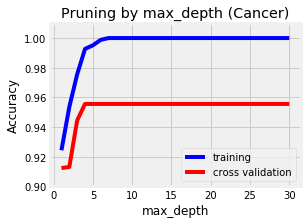

In [44]:
plt.plot(degree, np.median(train_scores, 1),color='blue', label='training')
plt.plot(degree, np.median(val_scores, 1), color='red', label='cross validation')
#plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
#plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc='lower right')
plt.ylim(0.9, 1.01)
plt.title("Pruning by max_depth (Cancer)")
plt.xlabel('max_depth')
plt.ylabel('Accuracy');
plt.xticks(np.arange(0,31,5))
plt.show()

In [27]:
degree = range(1,31)
train_score=0
val_score=0
repeat=10
for i in range(repeat):
    train_scores, val_scores = validation_curve(DecisionTreeClassifier(criterion='entropy',min_samples_split = 9), train_X, train_Y,
                                          'max_depth', degree, cv=10)
    train_score += np.mean(train_scores,1)
    val_score += np.mean(val_scores,1)
train_score /= repeat
val_score /= repeat

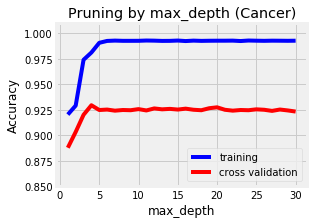

In [28]:
plt.plot(degree, train_score,color='blue', label='training')
plt.plot(degree, val_score, color='red', label='cross validation')

plt.legend(loc='lower right')
plt.ylim(0.85, 1.01)
plt.title("Pruning by max_depth (Cancer)")
plt.xlabel('max_depth')
plt.ylabel('Accuracy');
plt.xticks(np.arange(0,31,5))
plt.show()

### change max_depth

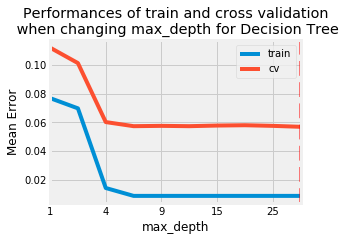

In [30]:
dtc_paras={"max_depth":[1,2,4,6,9,12,15,20,25,30]}
resTreepd = pd.DataFrame(dtc_paras)
resTreepd["train"] = resTreepd["cv"] = np.zeros(len(dtc_paras["max_depth"]))
repeat = 10
for _ in range(repeat):
    dtc=DecisionTreeClassifier(criterion = "entropy",min_samples_split = 9)
    gscvTree=GridSearchCV(dtc, dtc_paras,cv=5,n_jobs=2)
    gscvTree.fit(train_X, train_Y)
    resTree = gscvTree.cv_results_
    resTreepd["train"] += 1-np.array(resTree['mean_train_score'])
    resTreepd["cv"] += 1-np.array(resTree['mean_test_score'])
resTreepd["train"] /= repeat
resTreepd["cv"] /= repeat
resTreepd.max_depth = resTreepd.max_depth.astype(str)
resTreepd=resTreepd.set_index(["max_depth"])
ax=resTreepd.plot(title="Performances of train and cross validation\n when changing max_depth for Decision Tree")
ax.set_ylabel("Mean Error")
idxmin = [i for i in range(resTreepd.shape[0]) if resTreepd.index[i] == resTreepd.idxmin()['cv']]
ax.axvline(x=idxmin[0],color='r',ls='--',alpha=0.5)
plt.show()

### change min split
The minimum number of samples required to split an internal node

In [45]:
degree = range(2,100)
train_scores, val_scores = validation_curve(DecisionTreeClassifier(max_depth=5,random_state=42), train_X, train_Y,
                                          'min_samples_split', degree, cv=10)

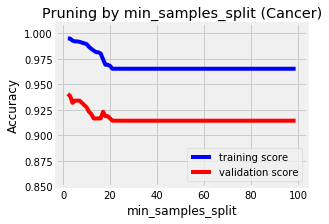

In [46]:
plt.plot(degree, np.mean(train_scores, 1), color='blue', label='training score')
plt.plot(degree, np.mean(val_scores, 1), color='red', label='validation score')
plt.legend(loc='lower right')
plt.ylim(0.85, 1.01)
plt.title("Pruning by min_samples_split (Cancer)")
plt.xlabel('min_samples_split')
plt.ylabel('Accuracy');
plt.show()

### Grid search to find best parameter

In [72]:
# determine optimal pruning for the decision trees using cross-validation grid-search

# set of parameters to test
param_grid = {"criterion": ["gini", "entropy"],
              "min_samples_split": [2,3,4, 5,6, 10, 20],
              "max_depth": [2, 3,4,5,6,7, 10, 15, 20],
              }

tree_gs = GridSearchCV(DecisionTreeClassifier(random_state=42),
                       param_grid=param_grid, cv=3)

tree_gs.fit(train_X, train_Y)

GridSearchCV(cv=3, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_split': [2, 3, 4, 5, 6, 10, 20], 'criterion': ['gini', 'entropy'], 'max_depth': [2, 3, 4, 5, 6, 7, 10, 15, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [73]:
tree_gs.best_params_

{'criterion': 'entropy', 'max_depth': 4, 'min_samples_split': 2}

### statistics for best parameter

In [83]:
tree_final_model = tree_gs.best_estimator_
start = timeit.default_timer()
clf = tree_final_model.fit(train_X, train_Y)
stop = timeit.default_timer()
train_time = stop - start
treeObj = clf.tree_

# train
train_Y_predict = clf.predict(train_X)
train_acc = accuracy_score(train_Y, train_Y_predict)

# test
start = timeit.default_timer()
test_Y_predict = clf.predict(test_X)
stop = timeit.default_timer()
test_time = stop - start
test_acc = accuracy_score(test_Y, test_Y_predict)

# print result
print 'tree size: ', treeObj.node_count
print 'train acc: ', train_acc
print 'test acc: ', test_acc
print 'train time: ', train_time
print 'test time: ', test_time

tree size:  21
train acc:  0.982417582418
test acc:  0.964912280702
train time:  0.00795197486877
test time:  0.000230073928833


### statistics for default parameter

In [317]:
clf = DecisionTreeClassifier()
start = timeit.default_timer()
clf = clf.fit(train_X, train_Y)
stop = timeit.default_timer()
train_time = stop - start
treeObj = clf.tree_

# train
train_Y_predict = clf.predict(train_X)
train_acc = accuracy_score(train_Y, train_Y_predict)

# test
start = timeit.default_timer()
test_Y_predict = clf.predict(test_X)
stop = timeit.default_timer()
test_time = stop - start
test_acc = accuracy_score(test_Y, test_Y_predict)

# print result
print 'tree size: ', treeObj.node_count
print 'train acc: ', train_acc
print 'test acc: ', test_acc
print 'train time: ', train_time
print 'test time: ', test_time

tree size:  37
train acc:  1.0
test acc:  0.938596491228
train time:  0.0111398696899
test time:  0.000326156616211


### learning curve on best parameter

In [63]:
training_size, train_lc, val_lc = learning_curve(tree_final_model,
                                         train_X, train_Y, cv=10,
                                         #train_sizes=np.arange(1, 409), n_jobs=1)
                                         train_sizes=np.linspace(0.001, 1, 50), n_jobs=1)

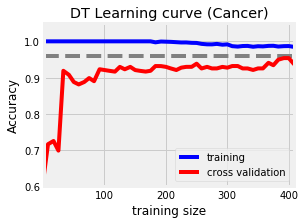

In [64]:
plt.plot(training_size, np.mean(train_lc, 1), color='blue', label='training')
plt.plot(training_size, np.mean(val_lc, 1), color='red', label='cross validation')
plt.hlines(np.mean([train_lc[-1], val_lc[-1]]), training_size[0], training_size[-1],
                 color='gray', linestyle='dashed')

plt.legend(loc='lower right')
plt.ylim(0.6, 1.05)
plt.xlim(training_size[0], training_size[-1])
plt.title("DT Learning curve (Cancer)")
plt.xlabel('training size')
plt.ylabel('Accuracy');
plt.show()

### learning curve on a unprune tree

In [65]:
training_size, train_lc, val_lc = learning_curve(DecisionTreeClassifier(),
                                         train_X, train_Y, cv=10,
                                         train_sizes=np.linspace(0.001, 1, 50), n_jobs=1)

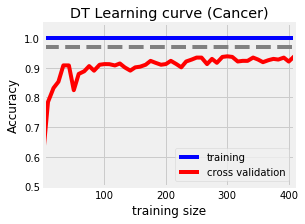

In [67]:
plt.plot(training_size, np.mean(train_lc, 1), color='blue', label='training')
plt.plot(training_size, np.mean(val_lc, 1), color='red', label='cross validation')
plt.hlines(np.mean([train_lc[-1], val_lc[-1]]), training_size[0], training_size[-1],
                 color='gray', linestyle='dashed')

plt.legend(loc='lower right')
plt.ylim(0.5, 1.05)
plt.xlim(training_size[0], training_size[-1])
plt.title("DT Learning curve (Cancer)")
plt.xlabel('training size')
plt.ylabel('Accuracy');
plt.show()

## 2.2 AdaBoosting
hyperparameters:

1) n_estimators

2) learning_rate

### iterations / n_estimators

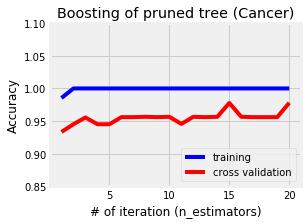

In [80]:
plt.plot(degree, np.mean(train_scores, 1), color='blue', label='training')
plt.plot(degree, np.mean(val_scores, 1), color='red', label='cross validation')
plt.legend(loc='lower right')
plt.ylim(0.85, 1.1)
plt.title("Boosting of pruned tree (Cancer)")
plt.xlabel('# of iteration')
plt.ylabel('Accuracy');
plt.show()

### show boosting works for a simple tree

In [84]:
degree = range(1,51)
train_scores, val_scores = validation_curve(AdaBoostClassifier(DecisionTreeClassifier(max_depth=5)), train_X, train_Y,
                                          'n_estimators', degree, cv=10)

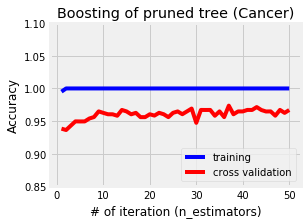

In [85]:
plt.plot(degree, np.mean(train_scores, 1), color='blue', label='training')
plt.plot(degree, np.mean(val_scores, 1), color='red', label='cross validation')
plt.legend(loc='lower right')
plt.ylim(0.85, 1.1)
plt.title("Boosting of pruned tree (Cancer)")
plt.xlabel('# of iteration (n_estimators)')
plt.ylabel('Accuracy');
plt.show()

### boosting - varying tree size and iteration

In [332]:
# don't change!!!

#degree = range(1,51,5)
degree = [1,2,5,10,20,50,100,200]
train_scoresb1, val_scoresb1 = validation_curve(AdaBoostClassifier(DecisionTreeClassifier(max_depth=2, min_samples_split=2)), train_X, train_Y,
                                          'n_estimators', degree, cv=10)
train_scoresb2, val_scoresb2 = validation_curve(AdaBoostClassifier(DecisionTreeClassifier(max_depth=5,min_samples_split=2)), train_X, train_Y,
                                          'n_estimators', degree, cv=10)
train_scoresb3, val_scoresb3 = validation_curve(AdaBoostClassifier(DecisionTreeClassifier(max_depth=10,min_samples_split=2)), train_X, train_Y,
                                          'n_estimators', degree, cv=10)
train_scoresb4, val_scoresb4 = validation_curve(AdaBoostClassifier(DecisionTreeClassifier(min_samples_split=2)), train_X, train_Y,
                                          'n_estimators', degree, cv=10)


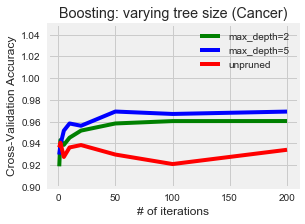

In [333]:

plt.plot(degree, np.mean(val_scoresb1, 1), color='green', label='max_depth=2')
plt.plot(degree, np.mean(val_scoresb2, 1), color='blue', label='max_depth=5')
#plt.plot(degree, np.mean(val_scoresb3, 1), color='purple', label='max_depth=10')
plt.plot(degree, np.mean(val_scoresb4, 1), color='red', label='unpruned')

plt.legend(loc='upper right')
plt.ylim(0.9, 1.05)
plt.title("Boosting: varying tree size (Cancer)")
plt.xlabel('# of iterations')
plt.ylabel('Cross-Validation Accuracy');
plt.show()


### boosting - vary learning rate

In [296]:
degree = np.arange(0.1,3,0.2)
train_scores, val_scores = validation_curve(AdaBoostClassifier(DecisionTreeClassifier(max_depth=4, min_samples_split=2)), train_X, train_Y,
                                          'learning_rate', degree, cv=10)

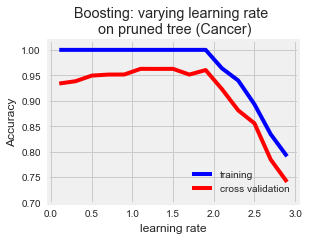

In [301]:
plt.plot(degree, np.mean(train_scores, 1), color='blue', label='training')
plt.plot(degree, np.mean(val_scores, 1), color='red', label='cross validation')

plt.legend(loc='lower right')
plt.ylim(0.7, 1.02)
plt.title("Boosting: varying learning rate \n on pruned tree (Cancer)")
plt.xlabel('learning rate')
plt.ylabel('Accuracy');
#plt.xticks(np.arange(0,2.1,0.5))
plt.show()

### grid search

In [302]:
param_grid = {"n_estimators": [1,5,10,15,30,40,50],
              "learning_rate": [.1, .5, 1.,1.2,1.5]
              }

tree_boost_gs = GridSearchCV(AdaBoostClassifier(tree_final_model),
                       param_grid=param_grid, cv=10)

tree_boost_gs.fit(train_X, train_Y)

GridSearchCV(cv=10, error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [1, 5, 10, 15, 30, 40, 50], 'learning_rate': [0.1, 0.5, 1.0, 1.2, 1.5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [303]:
tree_boost_gs.best_params_

{'learning_rate': 1.2, 'n_estimators': 40}

In [343]:
boost_final_model = tree_boost_gs.best_estimator_
clf = boost_final_model.fit(train_X, train_Y)

# train
train_Y_predict = clf.predict(train_X)
train_acc = accuracy_score(train_Y, train_Y_predict)

# test
test_Y_predict = clf.predict(test_X)
test_acc = accuracy_score(test_Y, test_Y_predict)

# print result
print 'train acc: ', train_acc
print 'test acc: ', test_acc

train acc:  1.0
test acc:  0.973684210526


In [106]:
boost_temp_model = AdaBoostClassifier(DecisionTreeClassifier(criterion='entropy',max_depth=4, min_samples_split=2),
                                     n_estimators=50, learning_rate=1.2)
clf = boost_temp_model.fit(train_X, train_Y)

start = timeit.default_timer()
clf = clf.fit(train_X, train_Y)
stop = timeit.default_timer()
train_time = stop - start

# train
train_Y_predict = clf.predict(train_X)
train_acc = accuracy_score(train_Y, train_Y_predict)

# test
start = timeit.default_timer()
test_Y_predict = clf.predict(test_X)
stop = timeit.default_timer()
test_time = stop - start
test_acc = accuracy_score(test_Y, test_Y_predict)

# print result
print 'train acc: ', train_acc
print 'test acc: ', test_acc
print 'train time: ', train_time
print 'test time: ', test_time

train acc:  1.0
test acc:  0.973684210526
train time:  0.376419067383
test time:  0.00397491455078


### boosting time vs iterations

In [309]:
time=[]
iteration=[]
for i in range(1,200,5):
    start = timeit.default_timer()
    clf = AdaBoostClassifier(tree_final_model, n_estimators=i)
    clf = clf.fit(train_X, train_Y)
    stop = timeit.default_timer()
    time.append(stop - start)
    iteration.append(i)

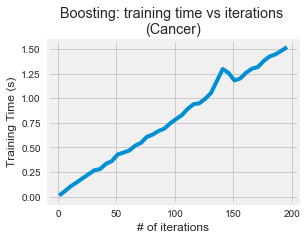

In [312]:
plt.plot(iteration, time)
plt.legend(loc='lower right')
#plt.ylim(0.7, 1.02)
plt.title("Boosting: training time vs iterations \n(Cancer)")
plt.xlabel('# of iterations')
plt.ylabel('Training Time (s)');
#plt.xticks(np.arange(0,2.1,0.5))
plt.show()

## 2.3 KNN

hyperparameters:

k

weight/unweight

### A simple run

In [108]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=5, weights='uniform', p=1)
clf.fit(train_X, train_Y)
train_acc = clf.score(train_X, train_Y)
test_acc = clf.score(test_X, test_Y)
print "Train acc:", train_acc
print "Test acc:", test_acc

Train acc: 0.975824175824
Test acc: 0.947368421053


### knn - change k unweighted

In [101]:
degree = range(1,51)
train_scores, val_scores = validation_curve(KNeighborsClassifier(), train_X, train_Y,
                                          'n_neighbors', degree, cv=10)

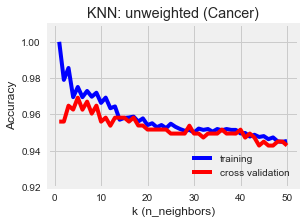

In [108]:
plt.plot(degree, np.mean(train_scores, 1), color='blue', label='training')
plt.plot(degree, np.mean(val_scores, 1), color='red', label='cross validation')
plt.legend(loc='lower right')
plt.ylim(0.92, 1.01)
plt.title("KNN: unweighted (Cancer)")
plt.xlabel('k (n_neighbors)')
plt.ylabel('Accuracy');
plt.show()

### knn - change k weighted by distance

In [103]:
degree = range(1,51)
train_scores_w, val_scores_w = validation_curve(KNeighborsClassifier(weights = 'distance'), train_X, train_Y,
                                          'n_neighbors', degree, cv=10)

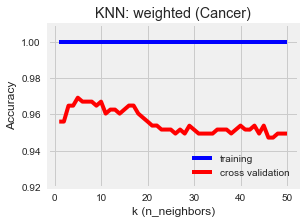

In [113]:
plt.plot(degree, np.mean(train_scores_w, 1), color='blue', label='training')
plt.plot(degree, np.mean(val_scores_w, 1), color='red', label='cross validation')
plt.legend(loc='lower right')
plt.ylim(0.92, 1.01)
plt.title("KNN: weighted (Cancer)")
plt.xlabel('k (n_neighbors)')
plt.ylabel('Accuracy');
plt.show()

### knn - unweighted vs weighted

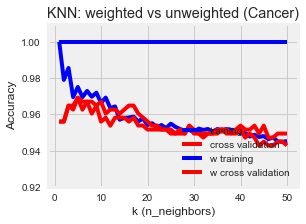

In [109]:
plt.plot(degree, np.mean(train_scores, 1), color='blue', label='training')
plt.plot(degree, np.mean(val_scores, 1), color='red', label='cross validation')
plt.plot(degree, np.mean(train_scores_w, 1), color='blue', label='w training')
plt.plot(degree, np.mean(val_scores_w, 1), color='red', label='w cross validation')
plt.legend(loc='lower right')
plt.ylim(0.92, 1.01)
plt.title("KNN: weighted vs unweighted (Cancer)")
plt.xlabel('k (n_neighbors)')
plt.ylabel('Accuracy');
plt.show()

### knn grid search

In [110]:
param_grid = {"n_neighbors": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,25,30,40,45,50],
              "p": [1, 2],
              "weights": ['uniform', 'distance']
              }

knn_gs = GridSearchCV(KNeighborsClassifier(),
                       param_grid=param_grid, cv=10)

knn_gs.fit(train_X, train_Y)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25, 30, 40, 45, 50], 'weights': ['uniform', 'distance'], 'p': [1, 2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [111]:
knn_gs.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=1,
           weights='uniform')

In [112]:
knn_final_model = knn_gs.best_estimator_
test_Y_predict = knn_final_model.fit(train_X, train_Y).predict(test_X)
accuracy_score(test_Y, test_Y_predict)

0.94736842105263153

In [115]:
knn_weighted_model = KNeighborsClassifier(n_neighbors=3, p=1, weights='distance')
test_Y_predict = knn_final_model.fit(train_X, train_Y).predict(test_X)
accuracy_score(test_Y, test_Y_predict)

0.94736842105263153

In [112]:
knn_temp_model = KNeighborsClassifier(n_neighbors=3, p=1, weights='uniform')
clf = knn_temp_model.fit(train_X, train_Y)

start = timeit.default_timer()
clf = clf.fit(train_X, train_Y)
stop = timeit.default_timer()
train_time = stop - start

# train
train_Y_predict = clf.predict(train_X)
train_acc = accuracy_score(train_Y, train_Y_predict)

# test
start = timeit.default_timer()
test_Y_predict = clf.predict(test_X)
stop = timeit.default_timer()
test_time = stop - start
test_acc = accuracy_score(test_Y, test_Y_predict)

# print result
print 'train acc: ', train_acc
print 'test acc: ', test_acc
print 'train time: ', train_time
print 'test time: ', test_time

train acc:  0.986813186813
test acc:  0.947368421053
train time:  0.00123286247253
test time:  0.0043671131134


### knn - learning curve on best model

In [116]:
training_size, train_lc, val_lc = learning_curve(knn_final_model,
                                         train_X, train_Y, cv=10,
                                         train_sizes=np.arange(10,409,5), n_jobs=5)

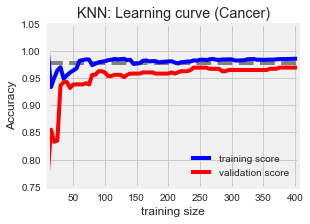

In [118]:
plt.plot(training_size, np.mean(train_lc, 1), color='blue', label='training score')
plt.plot(training_size, np.mean(val_lc, 1), color='red', label='validation score')
plt.hlines(np.mean([train_lc[-1], val_lc[-1]]), training_size[0], training_size[-1],
                 color='gray', linestyle='dashed')

plt.legend(loc='lower right')
plt.ylim(0.75, 1.05)
plt.xlim(training_size[0], training_size[-1])
plt.title("KNN: Learning curve (Cancer)")
plt.xlabel('training size')
plt.ylabel('Accuracy');
plt.show()

### knn: time vs iterations

In [153]:
train_time=[]
test_time=[]
iteration=[]
for i in range(1,51):
    start = timeit.default_timer()
    clf = KNeighborsClassifier(n_neighbors=i, weights='distance')
    clf = clf.fit(train_X, train_Y)
    stop = timeit.default_timer()
    train_time.append(stop - start)
    start = timeit.default_timer()
    test_Y_predict = clf.predict(test_X)
    stop = timeit.default_timer()
    test_time.append(stop - start)
    iteration.append(i)

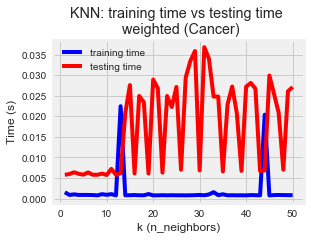

In [155]:
plt.plot(iteration, train_time, color='blue', label='training time')
plt.plot(iteration, test_time, color='red', label='testing time')
plt.legend(loc='upper left')
#plt.ylim(0.7, 1.02)
plt.title("KNN: training time vs testing time \n weighted (Cancer)")
plt.xlabel('k (n_neighbors)')
plt.ylabel('Time (s)');
#plt.xticks(np.arange(0,2.1,0.5))
plt.show()

In [138]:
time=[]
iteration=[]
for i in range(1,51):
    start = timeit.default_timer()
    clf = KNeighborsClassifier(n_neighbors=i, weights='distance')
    clf = clf.fit(train_X, train_Y)
    stop = timeit.default_timer()
    time.append(stop - start)
    iteration.append(i)

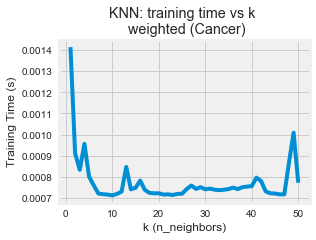

In [139]:
plt.plot(iteration, time)
plt.legend(loc='lower right')
#plt.ylim(0.7, 1.02)
plt.title("KNN: training time vs k \n weighted (Cancer)")
plt.xlabel('k (n_neighbors)')
plt.ylabel('Training Time (s)');
#plt.xticks(np.arange(0,2.1,0.5))
plt.show()

## 2.4 SVM

hyperparameters:

kernal: linear (c), poly(degree-c), rbf (c-gamma)

Linear Kernel: No parameters

Polynomial: (gamma*u'*v + coef0)^degree (using libsvm's nomenclature) Degree is the main parameter here, but you can also vary gamma & coef0 to make the kernel non-symmetric. If you are just starting out, I recommend you stick to varying degree.

RBF: exp(-gamma*|u-v|^2) Gamma is the main parameter.

### a simple run

In [26]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(train_X, train_Y)
train_acc = clf.score(train_X, train_Y)
test_acc = clf.score(test_X, test_Y)
print "Train acc:", train_acc
print "Test acc:", test_acc

Train acc: 0.991208791209
Test acc: 0.947368421053


In [26]:
clf = svm.SVC(kernel='rbf')
clf.fit(train_X, train_Y)
train_acc = clf.score(train_X, train_Y)
test_acc = clf.score(test_X, test_Y)
print "Train acc:", train_acc
print "Test acc:", test_acc

Train acc: 0.986813186813
Test acc: 0.956140350877


In [27]:
clf = svm.SVC(kernel='poly')
clf.fit(train_X, train_Y)
train_acc = clf.score(train_X, train_Y)
test_acc = clf.score(test_X, test_Y)
print "Train acc:", train_acc
print "Test acc:", test_acc

Train acc: 0.916483516484
Test acc: 0.912280701754


### svm - poly kernel, degree vs C

In [40]:
degree = range(1,11)
#degree = [1,2,3,4,5,7,10]
train_scores_svm1, val_scores_svm1 = validation_curve(svm.SVC(kernel='poly', C=0.01), train_X, train_Y,
                                          'degree', degree, cv=10)
train_scores_svm2, val_scores_svm2 = validation_curve(svm.SVC(kernel='poly', C=0.1), train_X, train_Y,
                                          'degree', degree, cv=10)
train_scores_svm3, val_scores_svm3 = validation_curve(svm.SVC(kernel='poly', C=1), train_X, train_Y,
                                          'degree', degree, cv=10)
train_scores_svm4, val_scores_svm4 = validation_curve(svm.SVC(kernel='poly', C=10), train_X, train_Y,
                                          'degree', degree, cv=10)

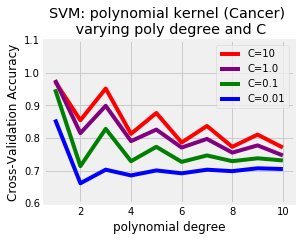

In [54]:
plt.plot(degree, np.mean(val_scores_svm4, 1), color='red', label='C=10')
plt.plot(degree, np.mean(val_scores_svm3, 1), color='purple', label='C=1.0')
plt.plot(degree, np.mean(val_scores_svm2, 1), color='green', label='C=0.1')
plt.plot(degree, np.mean(val_scores_svm1, 1), color='blue', label='C=0.01')

plt.legend(loc='upper right')
plt.ylim(0.6, 1.1)
plt.title("SVM: polynomial kernel (Cancer) \n varying poly degree and C")
plt.xlabel('polynomial degree')
plt.ylabel('Cross-Validation Accuracy');
plt.show()

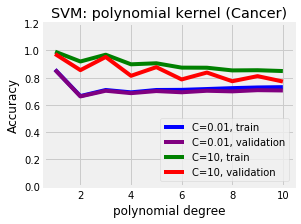

In [55]:
# plot validation curve
plt.plot(degree, np.mean(train_scores_svm1, 1), color='blue', label='C=0.01, train')
plt.plot(degree, np.mean(val_scores_svm1, 1), color='purple', label='C=0.01, validation')
plt.plot(degree, np.mean(train_scores_svm4, 1), color='green', label='C=10, train')
plt.plot(degree, np.mean(val_scores_svm4, 1), color='red', label='C=10, validation')

plt.legend(loc='lower right')
plt.ylim(0, 1.2)
plt.title("SVM: polynomial kernel (Cancer)")
plt.xlabel('polynomial degree')
plt.ylabel('Accuracy');
plt.show()

### svm - rbf, change C

In [68]:
#degree = [0.03,0.1,0.3,1.0,3.0,10.0,30.0,100.0,300]
degree = np.logspace(-1.5, 3, 10)
train_scores, val_scores = validation_curve(svm.SVC(kernel='rbf'), train_X, train_Y,
                                          'C', degree, cv=10)

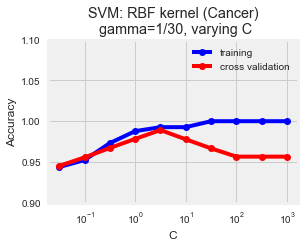

In [69]:
plt.plot(degree, np.median(train_scores, 1), 'o-',color='blue', label='training')
plt.plot(degree, np.median(val_scores, 1), 'o-', color='red', label='cross validation')

plt.legend(loc='upper right')
plt.ylim(0.9, 1.1)
plt.title("SVM: RBF kernel (Cancer)\n gamma=1/30, varying C")
plt.xlabel('C')
plt.ylabel('Accuracy');
plt.xscale('log')
plt.show()

### svm - rbf change gamma

In [70]:
#degree = [0.0001,0.0003,0.001,0.003,0.01,0.03,0.1,0.3]
degree = np.logspace(-4, 1, 11)

train_scores, val_scores = validation_curve(svm.SVC(kernel='rbf'), train_X, train_Y,
                                          'gamma', degree, cv=10)

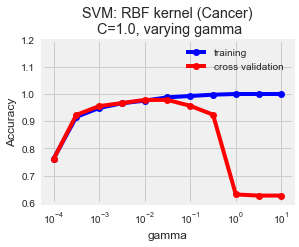

In [71]:
plt.plot(degree, np.median(train_scores, 1), 'o-',color='blue', label='training')
plt.plot(degree, np.median(val_scores, 1), 'o-', color='red', label='cross validation')

plt.legend(loc='upper right')
plt.ylim(0.6, 1.2)
plt.title("SVM: RBF kernel (Cancer)\n C=1.0, varying gamma")
plt.xlabel('gamma')
plt.ylabel('Accuracy');
plt.xscale('log')
plt.show()

### svm - rbf find best C/gamma combination

In [31]:
# For an initial search, a logarithmic grid with basis
# 10 is often helpful. Using a basis of 2, a finer
# tuning can be achieved but at a much higher cost.

#C_range = 10. ** np.arange(-3, 5)
#gamma_range = 10. ** np.arange(-5, 1)
#C_range = np.logspace(-2, 10, 13)
#gamma_range = np.logspace(-9, 3, 13)

#C_range = np.logspace(-2, 3, 6)
#gamma_range = np.logspace(-4, 1, 6)

C_range = [0.01,0.03,0.1,0.3,1,3,10,30,100,300,1000]
gamma_range = [0.0001,0.0003,0.001,0.003,0.01,0.03,1]

param_grid = dict(gamma=gamma_range, C=C_range)

grid = GridSearchCV(svm.SVC(kernel='rbf'), param_grid=param_grid, cv=5)
grid.fit(train_X, train_Y)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000], 'gamma': [0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [32]:
print("The best classifier is: ", grid.best_estimator_)

('The best classifier is: ', SVC(C=3, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.03, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))


In [33]:
svm_final_model = grid.best_estimator_
test_Y_predict = svm_final_model.fit(train_X, train_Y).predict(test_X)
accuracy_score(test_Y, test_Y_predict)

0.94736842105263153

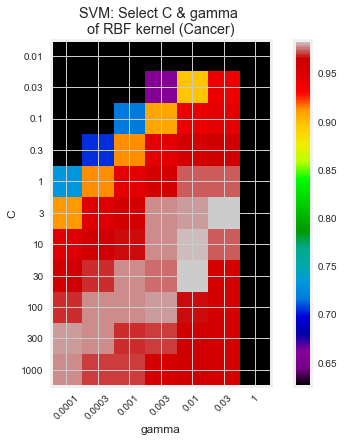

In [34]:
import pylab as pl
# plot the scores of the grid
# grid_scores_ contains parameter settings and scores
score_dict = grid.grid_scores_

# We extract just the scores
scores = [x[1] for x in score_dict]
scores = np.array(scores).reshape(len(C_range), len(gamma_range))

# Make a nice figure
pl.figure(figsize=(8, 6))
pl.subplots_adjust(left=0.15, right=0.95, bottom=0.15, top=0.95)
pl.imshow(scores, interpolation='nearest', cmap=pl.cm.spectral)
pl.title('SVM: Select C & gamma \nof RBF kernel (Cancer)')
pl.xlabel('gamma')
pl.ylabel('C')
pl.colorbar()
pl.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
pl.yticks(np.arange(len(C_range)), C_range)
pl.show()

In [65]:
#another range
C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)

param_grid = dict(gamma=gamma_range, C=C_range)

grid = GridSearchCV(svm.SVC(kernel='rbf'), param_grid=param_grid, cv=5)
grid.fit(train_X, train_Y)
print("The best classifier is: ", grid.best_estimator_)

('The best classifier is: ', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))


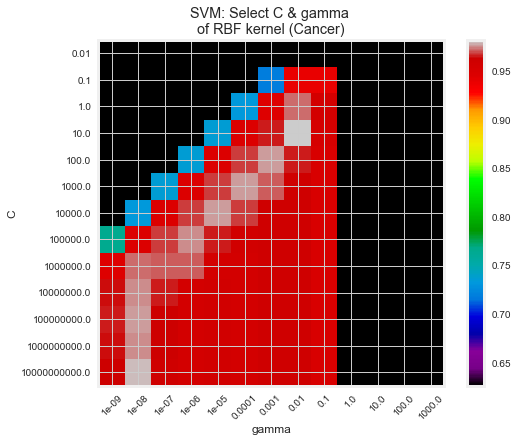

In [66]:
# plot the scores of the grid
# grid_scores_ contains parameter settings and scores
score_dict = grid.grid_scores_

# We extract just the scores
scores = [x[1] for x in score_dict]
scores = np.array(scores).reshape(len(C_range), len(gamma_range))

# Make a nice figure
pl.figure(figsize=(8, 6))
pl.subplots_adjust(left=0.15, right=0.95, bottom=0.15, top=0.95)
pl.imshow(scores, interpolation='nearest', cmap=pl.cm.spectral)
pl.title('SVM: Select C & gamma \nof RBF kernel (Cancer)')
pl.xlabel('gamma')
pl.ylabel('C')
pl.colorbar()
pl.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
pl.yticks(np.arange(len(C_range)), C_range)
pl.show()

In [67]:
clf = svm.SVC(kernel='rbf', C=10, gamma=0.01)
#clf = grid.best_estimator_
start = timeit.default_timer()
clf = clf.fit(train_X, train_Y)
stop = timeit.default_timer()
train_time = stop - start

# train
train_Y_predict = clf.predict(train_X)
train_acc = accuracy_score(train_Y, train_Y_predict)

# test
start = timeit.default_timer()
test_Y_predict = clf.predict(test_X)
stop = timeit.default_timer()
test_time = stop - start
test_acc = accuracy_score(test_Y, test_Y_predict)

# print result
print 'train acc: ', train_acc
print 'test acc: ', test_acc
print 'train time: ', train_time
print 'test time: ', test_time

train acc:  0.991208791209
test acc:  0.964912280702
train time:  0.00654911994934
test time:  0.000943899154663


### svm - linear learning curve

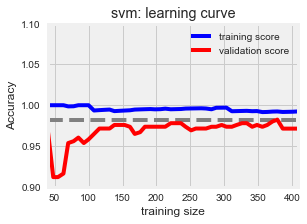

In [77]:
# use linear kernel
training_size, train_lc, val_lc = learning_curve(svm.SVC(kernel='linear'),
                                         train_X, train_Y, cv=10,
                                         train_sizes=np.linspace(0.1, 1, 50), n_jobs=1)

plt.plot(training_size, np.mean(train_lc, 1), color='blue', label='training score')
plt.plot(training_size, np.mean(val_lc, 1), color='red', label='validation score')
plt.hlines(np.mean([train_lc[-1], val_lc[-1]]), training_size[0], training_size[-1],
                 color='gray', linestyle='dashed')

plt.legend(loc='best')
plt.ylim(0.9, 1.1)
plt.xlim(training_size[0], training_size[-1])
plt.title("svm: learning curve")
plt.xlabel('training size')
plt.ylabel('Accuracy');
plt.show()

In [81]:
# use best rbf kernel
training_size, train_lc, val_lc = learning_curve(svm.SVC(kernel='rbf', C=10, gamma=0.01),
                                         train_X, train_Y, cv=10,
                                         train_sizes=np.arange(10,409,10), n_jobs=1)

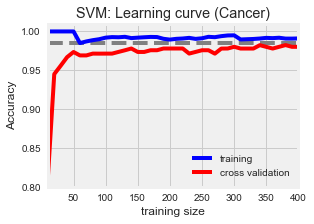

In [85]:
plt.plot(training_size, np.mean(train_lc, 1), color='blue', label='training')
plt.plot(training_size, np.mean(val_lc, 1), color='red', label='cross validation')
plt.hlines(np.mean([train_lc[-1], val_lc[-1]]), training_size[0], training_size[-1],
                 color='gray', linestyle='dashed')

plt.legend(loc='lower right')
plt.ylim(0.8, 1.01)
plt.xlim(training_size[0], training_size[-1])
plt.title("SVM: Learning curve (Cancer)")
plt.xlabel('training size')
plt.ylabel('Accuracy');
plt.show()

## 2.5 Neural Networks

the number of hidden nodes/layers, momentum and learning rates in a Neural Network are hyperparameters

### a simple mlp nn

In [25]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier()
clf.fit(train_X, train_Y)
train_acc = clf.score(train_X, train_Y)
test_acc = clf.score(test_X, test_Y)
print "Train acc:", train_acc
print "Test acc:", test_acc

Train acc: 0.995604395604
Test acc: 0.947368421053


### mlp - hidden layer 

### MLP: # layers & # nodes

In [50]:
degree1 = [(10,),(10,10),(10,10,10)]
degree2 = [(20,),(20,20),(20,20,20)]
degree3 = [(50,),(50,50),(50,50,50)]
degree = np.concatenate([degree1,degree2,degree3])
train_scores, val_scores = validation_curve(MLPClassifier(), train_X, train_Y,
                                          'hidden_layer_sizes', degree, cv=3)

In [51]:
np.mean(train_scores,1)

array([ 0.98681677,  0.99010987,  0.99010625,  0.98791327,  0.99669967,
        0.99889989,  0.99340296,  1.        ,  1.        ])

In [52]:
np.mean(val_scores,1)

array([ 0.97359707,  0.98020507,  0.97802661,  0.97583362,  0.98239805,
        0.97799756,  0.98242709,  0.98020507,  0.9758191 ])

### mlp hidden layer units (1 layer)

https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

There are many rule-of-thumb methods for determining the correct number of neurons to use in the hidden layers, such as the following:

The number of hidden neurons should be between the size of the input layer and the size of the output layer.

The number of hidden neurons should be 2/3 the size of the input layer, plus the size of the output layer.

The number of hidden neurons should be less than twice the size of the input layer.

### MLP: change # of nodes (1 layer)

In [40]:
degree = [(2,),(5,),(10,),(20,),(50,),(100,),(200,)]
train_scores, val_scores = validation_curve(MLPClassifier(), train_X, train_Y,
                                          'hidden_layer_sizes', degree, cv=10, n_jobs=3)

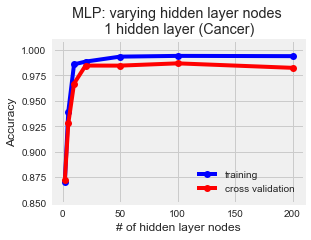

In [45]:
plt.plot(degree, np.mean(train_scores, 1), 'o-',color='blue', label='training')
plt.plot(degree, np.mean(val_scores, 1), 'o-', color='red', label='cross validation')

plt.legend(loc='lower right')
plt.ylim(0.85, 1.01)
plt.title("MLP: varying hidden layer nodes \n1 hidden layer (Cancer)")
plt.xlabel('# of hidden layer nodes')
plt.ylabel('Accuracy');
plt.show()

In [68]:
degree = [(20,),(50,),(100,),(50,50),(50,50,50)]

mlps=[]
train_times=[]
test_times=[]
train_accs=[]
test_accs=[]

for i in range(len(degree)):
    # train
    mlp = MLPClassifier(max_iter=10000, early_stopping=True,hidden_layer_sizes=degree[i])
    start = timeit.default_timer()
    mlp.fit(train_X, train_Y)
    stop = timeit.default_timer()
    train_time = stop - start
    # train result
    train_Y_predict = clf.predict(train_X)
    train_acc = accuracy_score(train_Y, train_Y_predict)
    # test
    start = timeit.default_timer()
    test_Y_predict = clf.predict(test_X)
    stop = timeit.default_timer()
    test_time = stop - start
    test_acc = accuracy_score(test_Y, test_Y_predict)
    # save results
    mlps.append(mlp)
    train_times.append(train_time)
    test_times.append(test_time)
    train_accs.append(train_acc)
    test_accs.append(test_acc)
    print degree[i], train_acc,test_acc,train_time,test_time

print "degree|train acc|test acc|train time|test time"
for i in range(len(degree)):
    print degree[i], train_accs[i],test_accs[i],train_times[i],test_times[i]

(20,) 0.993406593407 0.947368421053 0.0474140644073 0.000450134277344
(50,) 0.993406593407 0.947368421053 0.0336589813232 0.000200986862183
(100,) 0.993406593407 0.947368421053 0.0714800357819 0.000443935394287
(50, 50) 0.993406593407 0.947368421053 0.0266489982605 0.000214099884033
(50, 50, 50) 0.993406593407 0.947368421053 0.0742859840393 0.0002121925354
degree|train acc|test acc|train time|test time
(20,) 0.993406593407 0.947368421053 0.0474140644073 0.000450134277344
(50,) 0.993406593407 0.947368421053 0.0336589813232 0.000200986862183
(100,) 0.993406593407 0.947368421053 0.0714800357819 0.000443935394287
(50, 50) 0.993406593407 0.947368421053 0.0266489982605 0.000214099884033
(50, 50, 50) 0.993406593407 0.947368421053 0.0742859840393 0.0002121925354


### mlp momentum

### ann: change L and M

In [72]:
params = [{'solver': 'sgd', 'learning_rate': 'constant', 'momentum': 0,
           'learning_rate_init': 0.001},
          {'solver': 'sgd', 'learning_rate': 'constant', 'momentum': .9,
           'learning_rate_init': 0.001},
          {'solver': 'sgd', 'learning_rate': 'constant', 'momentum': 0.5,
           'learning_rate_init': 0.001},
          {'solver': 'sgd', 'learning_rate': 'constant', 'momentum': 0.5,
           'learning_rate_init': 0.01},
          {'solver': 'sgd', 'learning_rate': 'constant', 'momentum': 0.5,
           'learning_rate_init': 0.1},
         ]

mlps=[]

for param in params:
    mlp = MLPClassifier(hidden_layer_sizes=(22,),verbose=0, max_iter=10000, **param)
    mlp.fit(train_X, train_Y)
    mlps.append(mlp)

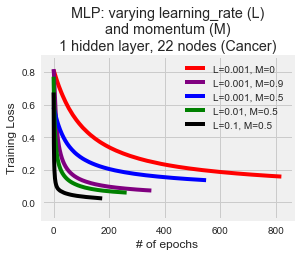

In [77]:
labels = ["L=0.001, M=0", 
          "L=0.001, M=0.9", 
          "L=0.001, M=0.5", 
          "L=0.01, M=0.5", 
          "L=0.1, M=0.5", 
         ]

plot_args = [{'c': 'red'},
             {'c': 'purple'},
             {'c': 'blue'},
             {'c': 'green'},
             {'c': 'black'}]   

for mlp, label, args in zip(mlps, labels, plot_args):
    plt.plot(mlp.loss_curve_, label=label, **args)

plt.legend(loc='upper right')
plt.ylim(-0.1, 0.9)
plt.title("MLP: varying learning_rate (L)\nand momentum (M)\n1 hidden layer, 22 nodes (Cancer)")
plt.xlabel('# of epochs')
plt.ylabel('Training Loss');
plt.show()

### grid search for L and M

In [47]:
param_grid = {"momentum": np.arange(0.1,1,0.1),
              "learning_rate_init": [.001, .01, 0.1, 1.],
              }

ann_gs = GridSearchCV(MLPClassifier(hidden_layer_sizes=(22,),solver='sgd',max_iter=10000,early_stopping=True,
                                   random_state=65),
                       param_grid=param_grid, cv=10)

ann_gs.fit(train_X, train_Y)

GridSearchCV(cv=10, error_score='raise',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(22,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=10000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=65, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'learning_rate_init': [0.001, 0.01, 0.1, 1.0], 'momentum': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [48]:
ann_gs.best_estimator_

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(22,), learning_rate='constant',
       learning_rate_init=1.0, max_iter=10000,
       momentum=0.80000000000000004, nesterovs_momentum=True, power_t=0.5,
       random_state=65, shuffle=True, solver='sgd', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [49]:
mlp_final_model = ann_gs.best_estimator_
test_Y_predict = mlp_final_model.fit(train_X, train_Y).predict(test_X)
accuracy_score(test_Y, test_Y_predict)

0.92105263157894735

### a sample run

In [120]:
#clf = MLPClassifier(hidden_layer_sizes=(22,),learning_rate_init=0.001,
#                    max_iter=10000)
mlp_temp_model = MLPClassifier(hidden_layer_sizes=(22,),solver='sgd',learning_rate_init=1, 
                               momentum=0.8, max_iter=10000)
start = timeit.default_timer()
clf = clf.fit(train_X, train_Y)
stop = timeit.default_timer()
train_time = stop - start

# train
train_Y_predict = clf.predict(train_X)
train_acc = accuracy_score(train_Y, train_Y_predict)

# test
start = timeit.default_timer()
test_Y_predict = clf.predict(test_X)
stop = timeit.default_timer()
test_time = stop - start
test_acc = accuracy_score(test_Y, test_Y_predict)

# print result
print 'train acc: ', train_acc
print 'test acc: ', test_acc
print 'train time: ', train_time
print 'test time: ', test_time

train acc:  0.993406593407
test acc:  0.947368421053
train time:  0.374462127686
test time:  0.00040602684021
